# Model genreation for Mnist_Fashion Dataset

### Step-1: We are using the following function to read the data and return it as a numpy array

In [2]:
import gzip
import struct 
import numpy as np

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        #np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

### Step-2: We use the function to extact our training and test datasets

In [3]:
x_train = read_idx("<Your Path>/train-images-idx3-ubyte.gz")
y_train = read_idx("<Your Path>/train-labels-idx1-ubyte.gz")
x_test = read_idx("<Your Path>/t10k-images-idx3-ubyte.gz")
y_test = read_idx("<Your Path>/t10k-labels-idx1-ubyte.gz")

### Step-3: Viewing the Data for the extracted Dataset

In [6]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("==>Number of samples in our training data: " + str(len(x_train)))
print ("==>Number of labels in our training data: " + str(len(y_train)))
print ("==>Number of samples in our test data: " + str(len(x_test)))
print ("==>Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
==>Number of samples in our training data: 60000
==>Number of labels in our training data: 60000
==>Number of samples in our test data: 10000
==>Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### Step-4: Let's view some sample images

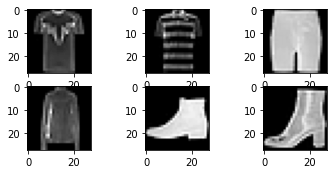

In [7]:
# Let's do the same thing but using matplotlib to plot 6 images 
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Step-5: Building our own Model Now 

In [8]:
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Training Parameters
batch_size = 128
epochs = 20

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

# Number of classed for classification
num_classes = y_test.shape[1]

# create model (Initially Empyty)
model = Sequential()

# Adding 1st Convoloution Layer with Relu Activation Function
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Adding 1st BatchNormalization as a Layer
model.add(BatchNormalization())

#Adding 1st Maxpooling layer to Reduce the size also using DroupOut
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Adding 2nd Convoloution Layer with Relu Activation Function
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#Adding 2nd BatchNormalization as a Layer
model.add(BatchNormalization())

# Adding 3rd Convoloution Layer with Relu Activation Function
model.add(Conv2D(32, (3, 3), activation='relu'))

#Adding 3rd BatchNormalization as a Layer
model.add(BatchNormalization())

#Adding 2nd Maxpooling layer to Reduce the size also using DroupOut
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Adding flattening layer 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Fully Connected Network having softmax activation for Multiclassification
model.add(Dense(num_classes, activation='softmax'))

#Finally compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

print(model.summary())

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
___________________________

### Step-6: Training the model for our use case

In [10]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          #callbacks=[callbacks]
                   )

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 156s 299ms/step - loss: 0.9241 - accuracy: 0.6906 - val_loss: 0.9210 - val_accuracy: 0.7121
Epoch 2/20
469/469 [==============================] - 140s 298ms/step - loss: 0.4095 - accuracy: 0.8528 - val_loss: 0.3579 - val_accuracy: 0.8688
Epoch 3/20
469/469 [==============================] - 141s 299ms/step - loss: 0.3443 - accuracy: 0.8766 - val_loss: 0.2970 - val_accuracy: 0.8945
Epoch 4/20
469/469 [==============================] - 142s 303ms/step - loss: 0.3128 - accuracy: 0.8854 - val_loss: 0.3992 - val_accuracy: 0.8508
Epoch 5/20
469/469 [==============================] - 140s 298ms/step - loss: 0.2855 - accuracy: 0.8971 - val_loss: 0.2769 - val_accuracy: 0.8983
Epoch 6/20
469/469 [==============================] - 139s 296ms/step - loss: 0.2689 - accuracy: 0.9029 - val_loss: 0.2985 - val_accuracy: 0.8887
Epoch 7/20
469/469 [==============================] - 139s 296ms/step - loss: 0.2621 - accuracy: 0.9069 - val_loss: 0.2794 -

### Final Loss and Accuracy

In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23133501410484314
Test accuracy: 0.9154999852180481


In [14]:
import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return "T-shirt/top "
    if number == 1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"

def draw_test(name, pred, actual, input_im):
    BLACK = [0,0,0]

    res = getLabel(pred)
    actual = getLabel(actual)   
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, 4*imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(np.argmax(model.predict(input_im, 1, verbose = 0), axis=-1)[0])
    #res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, actual, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [12]:
#from keras.models import save_model

In [13]:
model.save("mnist_model1.h5")